In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [25]:
games_df = pd.read_csv('games.csv')
game_deets_df = pd.read_csv('games_details.csv', low_memory=False)
players_df = pd.read_csv('players.csv')
ranking_df = pd.read_csv('ranking.csv')
teams_df = pd.read_csv('teams.csv')
games_df['GAME_DATE_EST']= pd.to_datetime(games_df['GAME_DATE_EST'])
pd.set_option('display.max_columns',21)

def get_mean(group, column):
    return group[column].mean()
def get_2mean(df,first,second):
    return (df[first]/df[second]).mean()
def get_2median(df,first,second):
    return (df[first]/df[second]).median()

In [26]:
print(f'Game details has {game_deets_df.shape[0]} rows and {game_deets_df.shape[1]} columns')
print(f'Team games has {games_df.shape[0]} rows and {games_df.shape[1]} columns')
print(f'Player informations has {players_df.shape[0]} rows and {players_df.shape[1]} columns')
print(f'Team ranking has {ranking_df.shape[0]} rows and {ranking_df.shape[1]} columns')
print(f'Team information has {teams_df.shape[0]} rows and {teams_df.shape[1]} columns')

Game details has 668628 rows and 29 columns
Team games has 26651 rows and 21 columns
Player informations has 7228 rows and 4 columns
Team ranking has 210342 rows and 13 columns
Team information has 30 rows and 14 columns


In [27]:
pct_home_win = games_df['HOME_TEAM_WINS'].value_counts()/len(games_df) * 100
print(f'Teams are likely to win {pct_home_win[1]:.2f}% during home games, and lose {pct_home_win[0]:.2f}% during home games')

Teams are likely to win 58.70% during home games, and lose 41.30% during home games


In [28]:
wl_group = games_df.groupby(['HOME_TEAM_WINS'])

win_filt = wl_group.get_group(1)
lose_filt = wl_group.get_group(0)

reb_grp = games_df.groupby(['REB_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)
losereb_grp = games_df.groupby(['REB_away','HOME_TEAM_WINS'])
losereb_table = losereb_grp.size().unstack(fill_value=0)
ast_grp = games_df.groupby(['AST_home','HOME_TEAM_WINS'])
mean_w_reb = get_mean(win_filt,'REB_home')
ast_table= ast_grp.size().unstack(fill_value=0)
lose_ast_grp = games_df.groupby(['AST_away','HOME_TEAM_WINS'])
lose_ast_table = lose_ast_grp.size().unstack(fill_value=0)
fgpct_grp = games_df.groupby(['FG_PCT_home','HOME_TEAM_WINS'])
fgpct_table = fgpct_grp.size().unstack(fill_value=0)
fgpct_grp_lose = games_df.groupby(['FG_PCT_away','HOME_TEAM_WINS'])
fgpct_away_table = fgpct_grp_lose.size().unstack(fill_value=0)
fg3pct_grp= games_df.groupby(['FG3_PCT_home','HOME_TEAM_WINS'])
fg3pct_table = fg3pct_grp.size().unstack(fill_value=0)
fg3pct_grp_lose = games_df.groupby(['FG3_PCT_away','HOME_TEAM_WINS'])
fg3pct_away_table = fg3pct_grp_lose.size().unstack(fill_value=0)
ast_reb_grp = games_df.groupby(['AST_home','REB_home','HOME_TEAM_WINS'])
ast_reb_table = ast_reb_grp.size().unstack(fill_value=0)
teams_grp = games_df.groupby(['HOME_TEAM_ID','HOME_TEAM_WINS'])
most_win_table = teams_grp['HOME_TEAM_WINS'].size().unstack(fill_value=0)
teams_df.sort_values(by='TEAM_ID',ascending = True,inplace = True)
most_win_table.sort_values(by='HOME_TEAM_ID',ascending = True,inplace = True)
most_win_table['NAME'] = teams_df['NICKNAME'].values
most_win_table['ARENA_CAP'] = teams_df['ARENACAPACITY'].values
most_win_table.sort_values(by='ARENA_CAP',ascending = False,inplace = True)


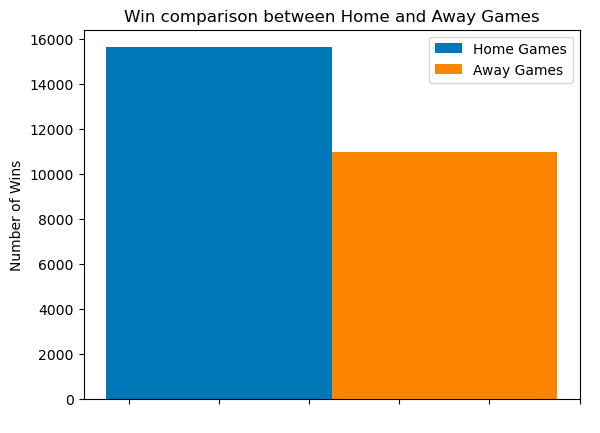

In [29]:

# do teams perform better when at home stadium?
#groupings and bar plot
x = win_filt['HOME_TEAM_WINS'].value_counts()
y = lose_filt['HOME_TEAM_WINS'].value_counts()

ti = [0.5]
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Games')
plt.bar(hor + 0.75,y,width = 0.25,color = '#fb8500',label = 'Away Games')

plt.ylabel('Number of Wins')
plt.xticks(color = 'w')
plt.title('Win comparison between Home and Away Games')
plt.legend()

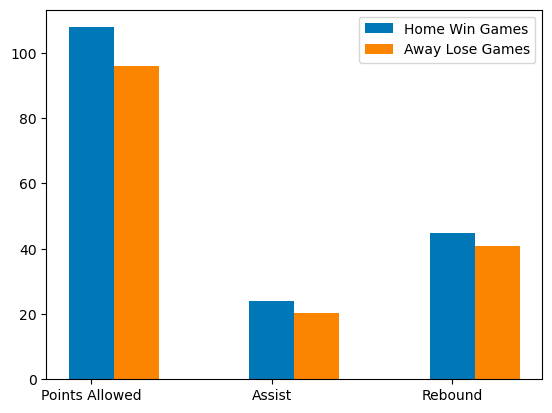

In [30]:
x = [get_mean(win_filt,'PTS_home'),get_mean(win_filt,'AST_home'),
     get_mean(win_filt,'REB_home')]
y = [get_mean(win_filt,'PTS_away'),get_mean(win_filt,'AST_away'),
     get_mean(win_filt,'REB_away')]

ti = ['Points Allowed','Assist','Rebound']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Win Games')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = 'Away Lose Games')
plt.legend()

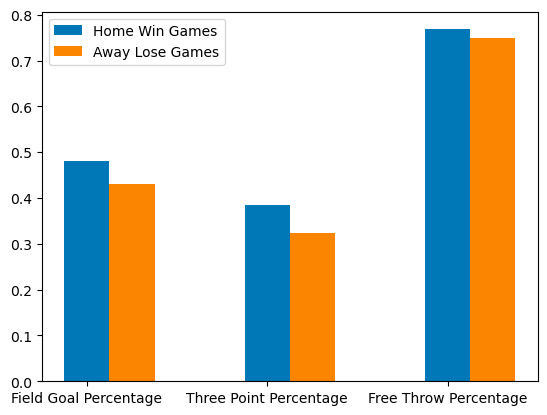

In [31]:
# plotting using the bar graph the difference between the fg pct and 3pt fg pct of home and away games
x = [get_mean(win_filt,'FG_PCT_home'),get_mean(win_filt,'FG3_PCT_home'),
    get_mean(win_filt,'FT_PCT_home')]
y = [get_mean(win_filt,'FG_PCT_away'),get_mean(win_filt,'FG3_PCT_away'),
    get_mean(win_filt,'FT_PCT_away')]
ti = ['Field Goal Percentage','Three Point Percentage','Free Throw Percentage']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Win Games')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = 'Away Lose Games')
plt.legend()

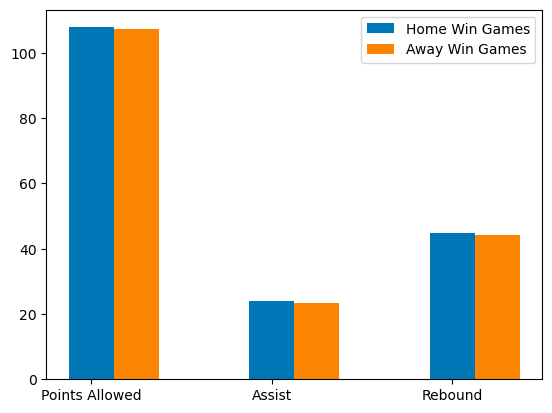

In [32]:
x = [get_mean(win_filt,'PTS_home'),get_mean(win_filt,'AST_home'),
    get_mean(win_filt,'REB_home')]
y = [get_mean(lose_filt,'PTS_away'),get_mean(lose_filt,'AST_away'),
    get_mean(lose_filt,'REB_away')]

ti = ['Points Allowed','Assist','Rebound']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Win Games')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = 'Away Win Games')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

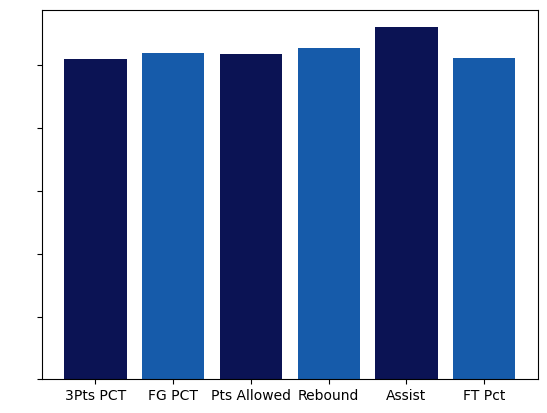

In [33]:
fg_3pct = get_2median(games_df,'FG3_PCT_home','FG3_PCT_away')
fg_pct = get_2mean(games_df,'FG_PCT_home','FG_PCT_away')
pts_allowed = get_2mean(games_df,'PTS_home','PTS_away')
reb = get_2mean(games_df,'REB_home','REB_away')
ast = get_2mean(games_df,'AST_home','AST_away')
free_throw = get_2mean(games_df,'FT_PCT_home','FT_PCT_away')

#making the plot
x = [fg_3pct,fg_pct,pts_allowed,reb,ast,free_throw]
y = ['3Pts PCT','FG PCT','Pts Allowed','Rebound','Assist','FT Pct']

plt.yticks(color = 'w')
plt.bar(y,x,color = ['#0b1354','#165baa'])
plt.show

In [34]:


# how much assists is it more likely to win
ast_grp = games_df.groupby(['AST_home','HOME_TEAM_WINS'])

mean_w_ast = get_mean(win_filt,'AST_home')
mean_l_ast = get_mean(lose_filt,'AST_home')
ptdif_w_ast = get_mean(win_filt,'PTS_home') - get_mean(win_filt,'PTS_away')

mean_w_reb = get_mean(win_filt,'REB_home')
mean_l_reb = get_mean(lose_filt,'REB_home')
ptdif_w_reb = win_filt['REB_home'] - win_filt['REB_away']
print(f' the mean amount of assists made by teams who won home games is {mean_w_ast:.0f}, and the mean amount of assists made by teams who lost home games is {mean_l_ast:.0f}')
print(f' the mean amount of assists made by teams who won home games is {mean_w_reb:.0f}, and the mean amount of assists made by teams who lost home games is {mean_l_reb:.0f}')

 the mean amount of assists made by teams who won home games is 24, and the mean amount of assists made by teams who lost home games is 21
 the mean amount of assists made by teams who won home games is 45, and the mean amount of assists made by teams who lost home games is 41


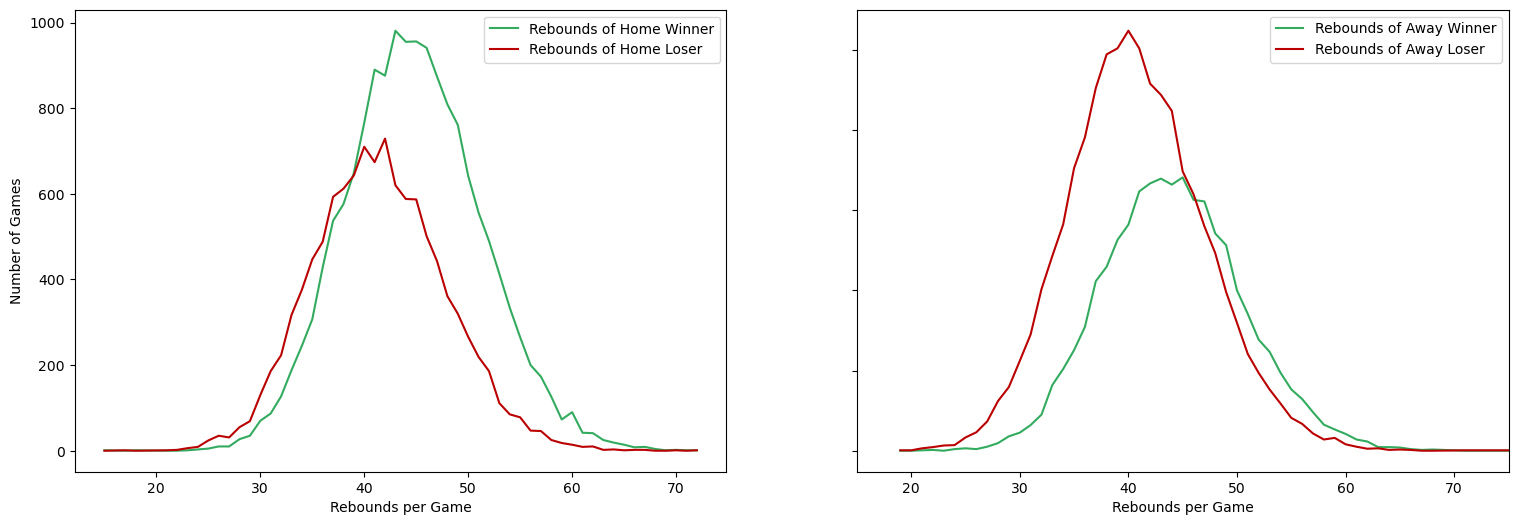

In [35]:
# compare it with rebounds of loser and winner
reb_grp = games_df.groupby(['REB_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)

# assigning the amount of rebounds the winner and loser has
plt.subplot(1,2,1)
plt.plot(reb_table[1], color = '#33AB5F',label = 'Rebounds of Home Winner')
plt.plot(reb_table[0], color = '#BA0001',label = 'Rebounds of Home Loser')

plt.ylabel('Number of Games')
plt.xlabel('Rebounds per Game')
plt.legend()

# compare the results from those who won and lost during home and away games
plt.subplot(1,2,2)
losereb_grp = games_df.groupby(['REB_away','HOME_TEAM_WINS'])
losereb_table = losereb_grp.size().unstack(fill_value=0)

plt.plot(losereb_table[0], color = '#33AB5F',label = 'Rebounds of Away Winner')
plt.plot(losereb_table[1], color = '#BA0001',label = 'Rebounds of Away Loser')

plt.yticks(c='w')
plt.xlim([15,75])
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('Rebounds per Game')
plt.legend()